<a href="https://colab.research.google.com/github/stonelly/suicideprediction/blob/main/SuicidePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.0 Business Understanding**

In nowadays norm, suicide is considered one of the critical social issues, as  suicide is quoted as the act of killing yourself deliberately. Globally, there are more than 700,000 persons committed suicide annually. Based on the publication of Global Health Estimates (Suicide worldwide in 2019), it is stated that 77% of deaths of suicide occured in the low and middle income countries.

Generally, suicide is linked to the mental health issue which is likely due to the pressure from the surrounding. Hence, we should look into the socioeconomics. Socioeconomics is a branch of economics focuses on the relationship between social behavior and economics. In this projects, key variables such as GDP, inflation rates, employment rate, academic qualification related data are conjectured to be crucial to proceed in the whole CRISP-DM process.


Objectives for this project are

1.) To determine which socioeconomics factor(s) is strongly correlated to the numbers of suicides

2.) To construct a model to forecast the potential risk of suicide

3.) To propose data product to relevant parties to improve this social phenomena


# **2.0 Data Preprocessing and Data cleaning**

Importing libaries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

##Importing csv

In [ ]:
df = pd.read_csv('suicide_rates_1990-2022.csv')

In [ ]:
print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


##inspecting the data

In [ ]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (118560, 18)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
RegionCode,object,0,0.000000,22584,6,118560,NaN,NaN,NaN,NaN,EU,EU,EU
RegionName,object,0,0.000000,22584,6,118560,NaN,NaN,NaN,NaN,Europe,Europe,Europe
CountryCode,object,0,0.000000,22584,117,118560,NaN,NaN,NaN,NaN,ALB,ALB,ALB
CountryName,object,0,0.000000,22584,117,118560,NaN,NaN,NaN,NaN,Albania,Albania,Albania
Year,int64,0,0.000000,22584,33,118560,1990.0,2022.0,2005.740047,8.745003,1992,1992,1992
Sex,object,0,0.000000,22584,3,118560,NaN,NaN,NaN,NaN,Male,Male,Male
AgeGroup,object,0,0.000000,22584,7,118560,NaN,NaN,NaN,NaN,0-14 years,0-14 years,0-14 years
Generation,object,0,0.000000,22584,7,118560,NaN,NaN,NaN,NaN,Generation Alpha,Generation Alpha,Generation Alpha
SuicideCount,float64,464,0.003914,22584,1868,118096,0.0,6787.0,63.632037,254.095408,0.0,0.0,0.0
CauseSpecificDeathPercentage,float64,4289,0.036176,22584,46425,114271,0.0,100.0,3.87369,7.31782,0.0,0.0,0.0


## Removing 2022 data

In [ ]:
# Excluding 2022 data

index_names = df[ df['Year'] == 2022 ].index

df.drop(index_names, inplace = True)


##Checking for null values

In [ ]:
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4267
DeathRatePer100K                10636
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64


## Data Transformation

Remove Irrelevant Variable

In [ ]:

clean_data = df
# remove similar value variables
# RegionCode : RegionName
# CountryCode : CountryName
# AgeGroup : Generation
clean_data.drop(columns=['RegionCode','CountryCode','AgeGroup'], inplace=True)

In [ ]:
# Assign "0" for female, "1" for male, "2" for unknown
clean_data.loc[clean_data["Sex"] == "Female", "Sex"] = 0
clean_data.loc[clean_data["Sex"] == "Male", "Sex"] = 1
clean_data.loc[clean_data["Sex"] == "Unknown", "Sex"] = 2


# Assign "0" for Unknown
# Assign "1" for Silent Generation
# Assign "2" for Baby Boomers
# Assign "3" for Generation X
# Assign "4" for Millennials
# Assign "5" for Generation Z
# Assign "6" for Generation Alpha
clean_data.loc[clean_data["Generation"] == "Unknown", "Generation"] = 0
clean_data.loc[clean_data["Generation"] == "Silent Generation", "Generation"] = 1
clean_data.loc[clean_data["Generation"] == "Baby Boomers", "Generation"] = 2
clean_data.loc[clean_data["Generation"] == "Generation X", "Generation"] = 3
clean_data.loc[clean_data["Generation"] == "Millennials", "Generation"] = 4
clean_data.loc[clean_data["Generation"] == "Generation Z", "Generation"] = 5
clean_data.loc[clean_data["Generation"] == "Generation Alpha", "Generation"] = 6

In [ ]:
clean_data['Sex'] = clean_data['Sex'].astype(int)
clean_data['Generation'] = clean_data['Generation'].astype(int)

In [ ]:
# Calculate percentage of missing values for each variable
percentage_missing = (clean_data.isnull().sum() / len(clean_data)) * 100

print("Percentage of missing values for each variable:")
print(percentage_missing)

Percentage of missing values for each variable:
RegionName                       0.000000
CountryName                      0.000000
Year                             0.000000
Sex                              0.000000
Generation                       0.000000
SuicideCount                     0.393220
CauseSpecificDeathPercentage     3.616102
DeathRatePer100K                 9.013559
Population                       5.016949
GDP                              6.135593
GDPPerCapita                     6.135593
GrossNationalIncome              8.440678
GNIPerCapita                     9.118644
InflationRate                   12.254237
EmploymentPopulationRatio        9.423729
dtype: float64


Apply K-Nearest Neighbors (KNN) Imputation for missing data, since there are no variable missing more than 20%

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Step 1: Identify numeric columns with missing values
numeric_columns = clean_data.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Apply KNN imputation only to numeric features
imputer = KNNImputer(n_neighbors=20)
clean_data[numeric_columns] = imputer.fit_transform(clean_data[numeric_columns])

print("\nMissing values in the DataFrame:")
print(clean_data.isnull().sum())


Missing values in the DataFrame:
RegionName                      0
CountryName                     0
Year                            0
Sex                             0
Generation                      0
SuicideCount                    0
CauseSpecificDeathPercentage    0
DeathRatePer100K                0
Population                      0
GDP                             0
GDPPerCapita                    0
GrossNationalIncome             0
GNIPerCapita                    0
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64


Export Clean data to csv

In [ ]:
def summary(clean_data):
    print(f'data shape: {clean_data.shape}')
    summ = pd.DataFrame(clean_data.dtypes, columns=['Data Type'])
    summ['Missing#'] = clean_data.isna().sum()
    summ['Missing%'] = (clean_data.isna().sum())/len(clean_data)
    summ['Dups'] = clean_data.duplicated().sum()
    summ['Uniques'] = clean_data.nunique().values
    summ['Count'] = clean_data.count().values
    desc = pd.DataFrame(clean_data.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = clean_data.loc[0].values
    summ['Second Value'] = clean_data.loc[1].values
    summ['Third Value'] = clean_data.loc[2].values

    display(summ)

summary(clean_data)

data shape: (118000, 15)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
RegionName,object,0,0.0,22541,6,118000,NaN,NaN,NaN,NaN,Europe,Europe,Europe
CountryName,object,0,0.0,22541,117,118000,NaN,NaN,NaN,NaN,Albania,Albania,Albania
Year,float64,0,0.0,22541,32,118000,1990.0,2021.0,2005.662881,8.693522,1992.0,1992.0,1992.0
Sex,float64,0,0.0,22541,3,118000,0.0,2.0,0.524407,0.530989,1.0,1.0,1.0
Generation,float64,0,0.0,22541,7,118000,0.0,6.0,3.25,1.867493,6.0,6.0,6.0
SuicideCount,float64,0,0.0,22541,1917,118000,0.0,6787.0,63.603605,254.209588,0.0,0.0,0.0
CauseSpecificDeathPercentage,float64,0,0.0,22541,48013,118000,0.0,100.0,3.847824,7.188788,0.0,0.0,0.0
DeathRatePer100K,float64,0,0.0,22541,73951,118000,0.0,502.512563,12.203729,20.44133,0.0,0.0,0.0
Population,float64,0,0.0,22541,4516,118000,40542.0,332031554.0,23910550.556902,44607777.774107,3247039.0,3247039.0,3247039.0
GDP,float64,0,0.0,22541,3361,118000,219762963.0,23315100000000.0,464328902808.66156,1609671552812.668945,652174990.8,652174990.8,652174990.8


In [ ]:

#  Save the df as data.csv
clean_data.to_csv('data_clean.csv', index=False)

## Df data cleaning

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
AgeGroup                        0
Generation                      0
SuicideCount                    0
CauseSpecificDeathPercentage    0
DeathRatePer100K                0
Population                      0
GDP                             0
GDPPerCapita                    0
GrossNationalIncome             0
GNIPerCapita                    0
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64

In [ ]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,88468.000000,88468.000000,88468.000000,88468.000000,8.846800e+04,8.846800e+04,88468.000000,8.846800e+04,88468.000000,88468.000000,88468.000000
mean,2006.681975,77.719254,4.223057,12.289537,2.627637e+07,5.566069e+11,18889.126168,5.562377e+11,23347.173554,18.004961,56.217100
std,8.232232,283.508755,7.516968,20.510888,4.735436e+07,1.794023e+12,20130.872184,1.812724e+12,19388.574479,161.349020,7.964525
min,1991.000000,0.000000,0.000000,0.000000,1.043320e+05,3.160074e+08,157.063550,3.122460e+08,1080.000000,-8.525170,32.026000
25%,2000.000000,0.000000,0.000000,0.000000,2.913021e+06,1.465540e+10,4064.253010,1.395922e+10,8840.000000,1.483129,51.216000
50%,2007.000000,7.000000,0.746269,4.713176,7.348328e+06,7.802747e+10,10810.566510,7.382014e+10,17800.000000,2.953409,56.736000
75%,2014.000000,42.000000,5.039839,15.439554,2.909616e+07,3.362800e+11,27906.569500,3.317660e+11,32060.000000,6.265860,60.829000
max,2021.000000,6787.000000,100.000000,338.573156,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88468 entries, 0 to 118558
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    88468 non-null  object 
 1   RegionName                    88468 non-null  object 
 2   CountryCode                   88468 non-null  object 
 3   CountryName                   88468 non-null  object 
 4   Year                          88468 non-null  int64  
 5   Sex                           88468 non-null  object 
 6   AgeGroup                      88468 non-null  object 
 7   Generation                    88468 non-null  object 
 8   SuicideCount                  88468 non-null  float64
 9   CauseSpecificDeathPercentage  88468 non-null  float64
 10  DeathRatePer100K              88468 non-null  float64
 11  Population                    88468 non-null  float64
 12  GDP                           88468 non-null  float64
 13  GDPPe

In [ ]:
df.nunique()

RegionCode                          6
RegionName                          6
CountryCode                       101
CountryName                       101
Year                               31
Sex                                 2
AgeGroup                            6
Generation                          6
SuicideCount                     1830
CauseSpecificDeathPercentage    40554
DeathRatePer100K                60636
Population                       2334
GDP                              2335
GDPPerCapita                     2335
GrossNationalIncome              2333
GNIPerCapita                     1852
InflationRate                    2335
EmploymentPopulationRatio        2225
dtype: int64

In [ ]:
# Correlation analysis
cat_features  = ['RegionCode','RegionName','CountryCode', 'CountryName','Sex','AgeGroup','Generation']
print("\nCorrelation matrix:")
df.drop(columns=cat_features).corr()


Correlation matrix:


,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
Year,1.000000,-0.024571,0.046371,-0.086874,0.013413,0.079207,0.270500,0.079562,0.364238,-0.135580,0.076427
SuicideCount,-0.024571,1.000000,0.146981,0.283798,0.528588,0.464625,0.068382,0.464011,0.042322,0.033114,0.015356
CauseSpecificDeathPercentage,0.046371,0.146981,1.000000,0.151603,0.001513,0.073701,0.229421,0.074736,0.167170,-0.020971,0.019830
DeathRatePer100K,-0.086874,0.283798,0.151603,1.000000,0.009553,0.022573,0.007744,0.022819,-0.030411,0.033046,-0.093461
Population,0.013413,0.528588,0.001513,0.009553,1.000000,0.789615,0.063246,0.787091,0.030528,0.042604,0.017176
GDP,0.079207,0.464625,0.073701,0.022573,0.789615,1.000000,0.289606,0.999321,0.238324,-0.024257,0.048243
GDPPerCapita,0.270500,0.068382,0.229421,0.007744,0.063246,0.289606,1.000000,0.288106,0.853879,-0.083996,0.295012
GrossNationalIncome,0.079562,0.464011,0.074736,0.022819,0.787091,0.999321,0.288106,1.000000,0.238000,-0.024231,0.046716
GNIPerCapita,0.364238,0.042322,0.167170,-0.030411,0.030528,0.238324,0.853879,0.238000,1.000000,-0.091119,0.372338
InflationRate,-0.135580,0.033114,-0.020971,0.033046,0.042604,-0.024257,-0.083996,-0.024231,-0.091119,1.000000,0.018864


In [ ]:
#  Save the df as data.csv

clean_data.to_csv('data.csv', index=False)

#**3.0 Exploratory Data Analysis (EDA)**

## Suicide by year


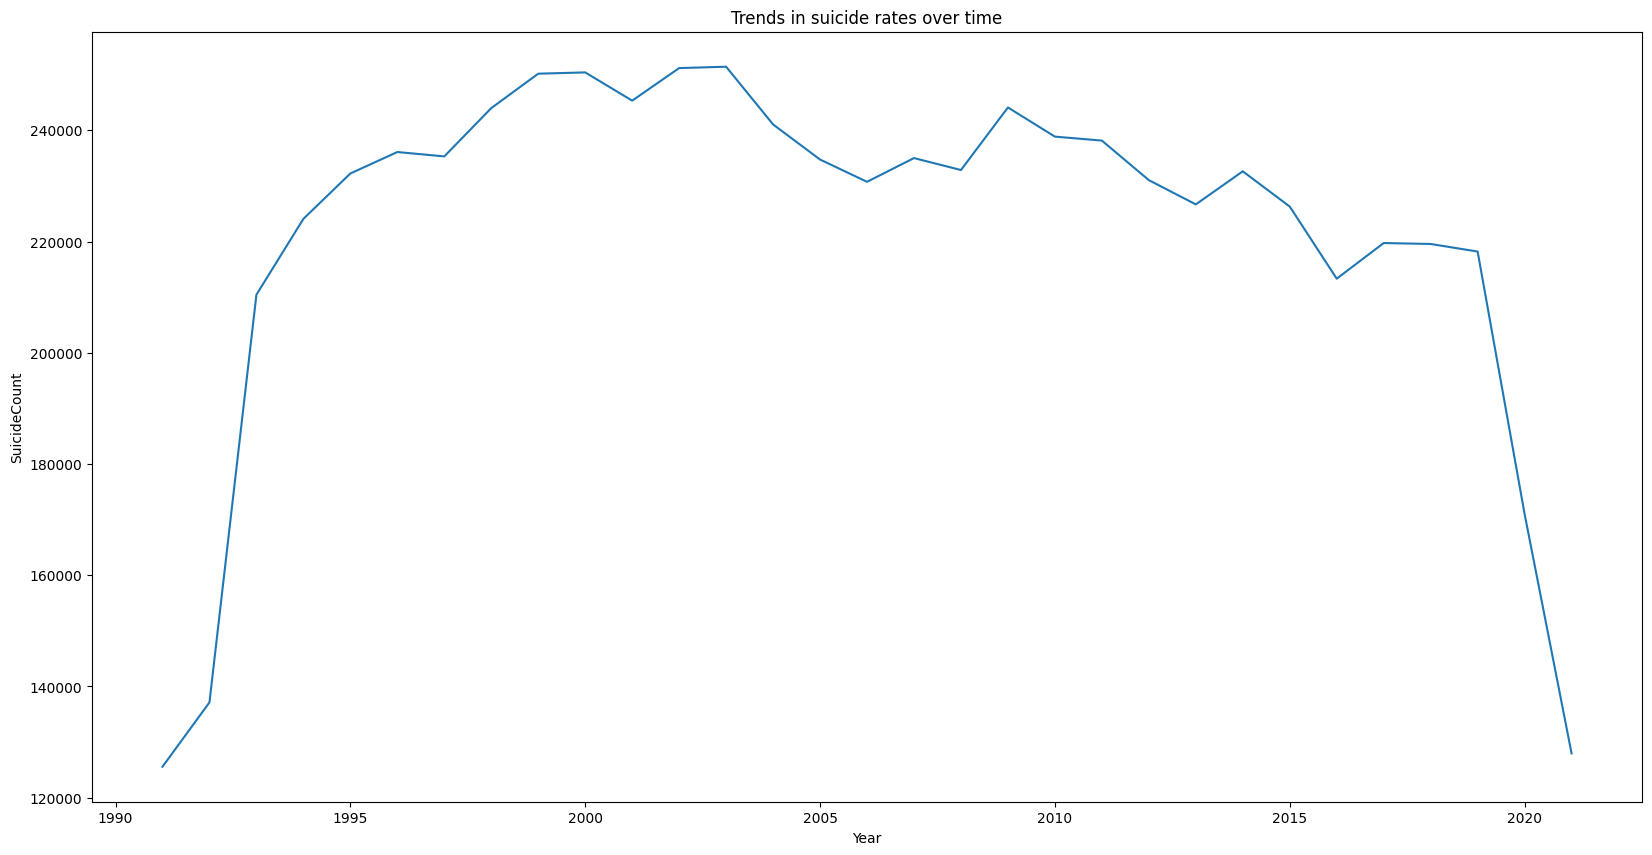

In [ ]:
suicide_by_year = df.groupby('Year')['SuicideCount'].sum()
suicide_by_year.plot(figsize=(20,10))
plt.title("Trends in suicide rates over time")
plt.ylabel("SuicideCount")
plt.xlabel('Year')
plt.show()

## Suicide by *Gender*

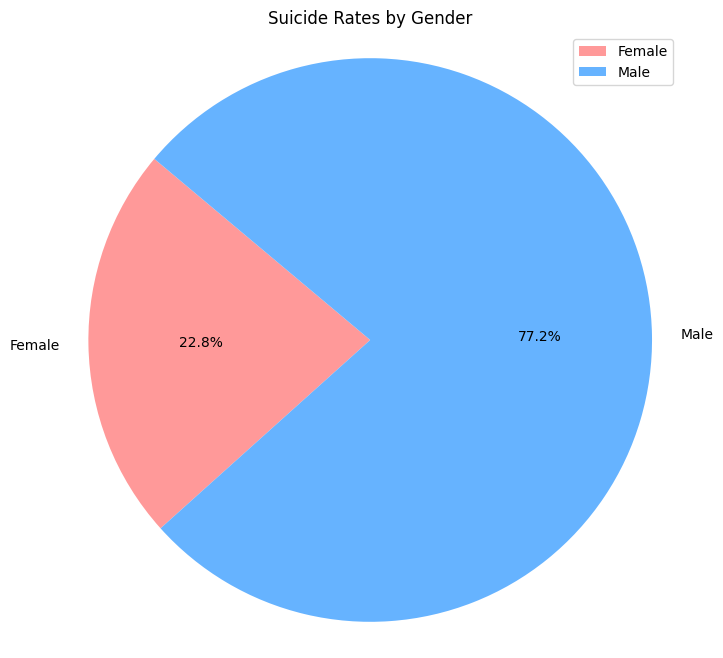

In [ ]:
suicide_by_gender_age = df.dropna().groupby(['Sex'])['SuicideCount'].sum()

labels = ['Female', 'Male']
colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(8, 8))
plt.pie(suicide_by_gender_age, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Suicide Rates by Gender')
plt.axis('equal')
plt.legend(labels, loc='upper right')

plt.show()

## Suicide by *Generation*


In [ ]:
df['Generation'].unique()

array(['Generation Alpha', 'Generation Z', 'Millennials', 'Generation X',
       'Baby Boomers', 'Silent Generation'], dtype=object)

In [ ]:
# Create datasets
df_Alpha = df[df['Generation'] == 'Generation Alpha']
df_Z = df[df['Generation'] == 'Generation Z']
df_Mill = df[df['Generation'] == 'Millennials']
df_X = df[df['Generation'] == 'Generation X']
df_BB = df[df['Generation'] == 'Baby Boomers']
df_Silent = df[df['Generation'] == 'Silent Generation']

# Groupby - Year
suicide_Alpha = df_Alpha.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Z = df_Z.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Mill = df_Mill.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_X = df_X.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_BB = df_BB.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Silent = df_Silent.groupby('Year')['SuicideCount'].sum().reset_index()

# Rename columns
suicide_Alpha.rename(columns = {'SuicideCount':'Alpha'}, inplace = True)
suicide_Z.rename(columns = {'SuicideCount':'Z'}, inplace = True)
suicide_Mill.rename(columns = {'SuicideCount':'Mill'}, inplace = True)
suicide_X.rename(columns = {'SuicideCount':'X'}, inplace = True)
suicide_BB.rename(columns = {'SuicideCount':'BB'}, inplace = True)
suicide_Silent.rename(columns = {'SuicideCount':'Silent'}, inplace = True)

# Concat datasets
suicide_generation = pd.concat([suicide_Alpha, suicide_Z, suicide_Mill,
                               suicide_X, suicide_BB, suicide_Silent])

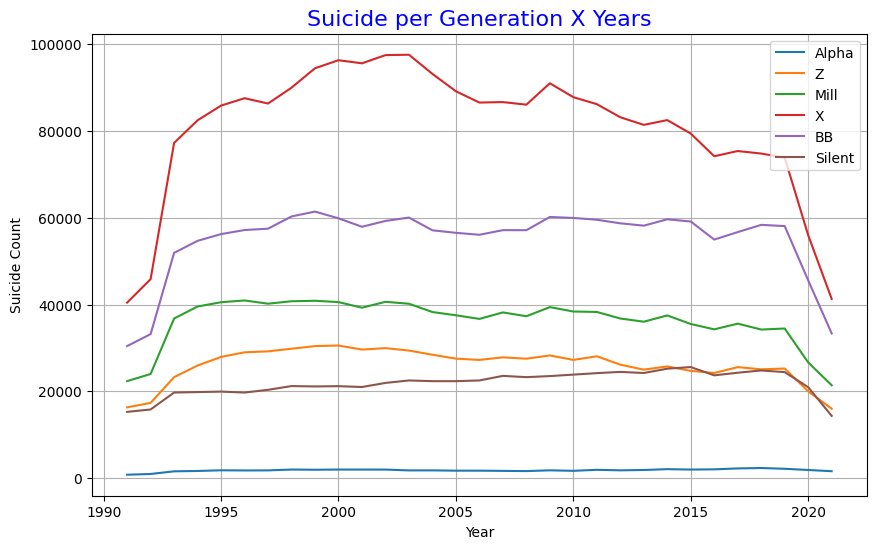

In [ ]:
# Suicide per Generation X Years
suicide_generation.plot(x="Year", y=['Alpha', 'Z', 'Mill', 'X', 'BB', 'Silent'],
              kind="line", figsize=(10, 6))
plt.title("Suicide per Generation X Years", fontsize = 16, color = 'blue')
plt.ylabel('Suicide Count', rotation=90, fontsize = 10)

plt.grid()
plt.show()

## Suicide by *Region*

In [ ]:
df['RegionName'].unique()

array(['Europe', 'Asia', 'Oceania', 'North America and the Caribbean',
       'Central and South America', 'Africa'], dtype=object)

In [ ]:
# Create datasets
df_Europe = df[df['RegionName'] == 'Europe']
df_Asia = df[df['RegionName'] == 'Asia']
df_Oceania = df[df['RegionName'] == 'Oceania']
df_Central_South_America = df[df['RegionName'] == 'Central and South America']
df_North_America_Caribbean = df[df['RegionName'] == 'North America and the Caribbean']
df_Africa = df[df['RegionName'] == 'Africa']

# Groupby - Year
suicide_Europe = df_Europe.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Asia = df_Asia.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Oceania = df_Oceania.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Central_South_America = df_Central_South_America.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_North_America_Caribbean = df_North_America_Caribbean.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Africa = df_Africa.groupby('Year')['SuicideCount'].sum().reset_index()

# Rename columns
suicide_Europe.rename(columns = {'SuicideCount':'Europe'}, inplace = True)
suicide_Asia.rename(columns = {'SuicideCount':'Asia'}, inplace = True)
suicide_Oceania.rename(columns = {'SuicideCount':'Oceania'}, inplace = True)
suicide_Central_South_America.rename(columns = {'SuicideCount':'Central_South_America'}, inplace = True)
suicide_North_America_Caribbean.rename(columns = {'SuicideCount':'North_America_Caribbean'}, inplace = True)
suicide_Africa.rename(columns = {'SuicideCount':'Africa'}, inplace = True)

# Concat datasets
suicide_continent = pd.concat([suicide_Europe, suicide_Asia, suicide_Oceania,
                               suicide_Central_South_America,
                              suicide_North_America_Caribbean, suicide_Africa])

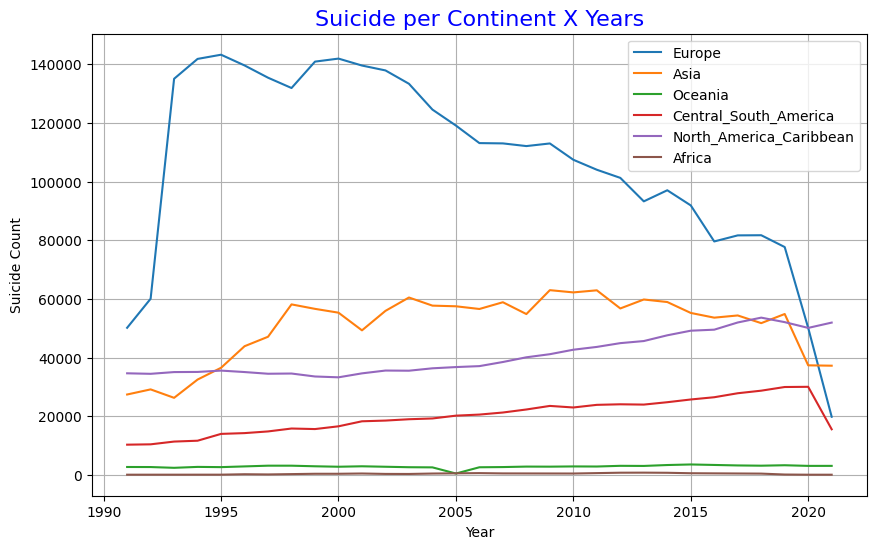

In [ ]:
# Suicide per Continent X Years
suicide_continent.plot(x="Year", y=['Europe', 'Asia', 'Oceania', 'Central_South_America',
                     'North_America_Caribbean', 'Africa'],
              kind="line", figsize=(10, 6))
plt.title("Suicide per Continent X Years", fontsize = 16, color = 'blue')
plt.ylabel('Suicide Count', rotation=90, fontsize = 10)

plt.grid()
plt.show()

##Corelation heat map


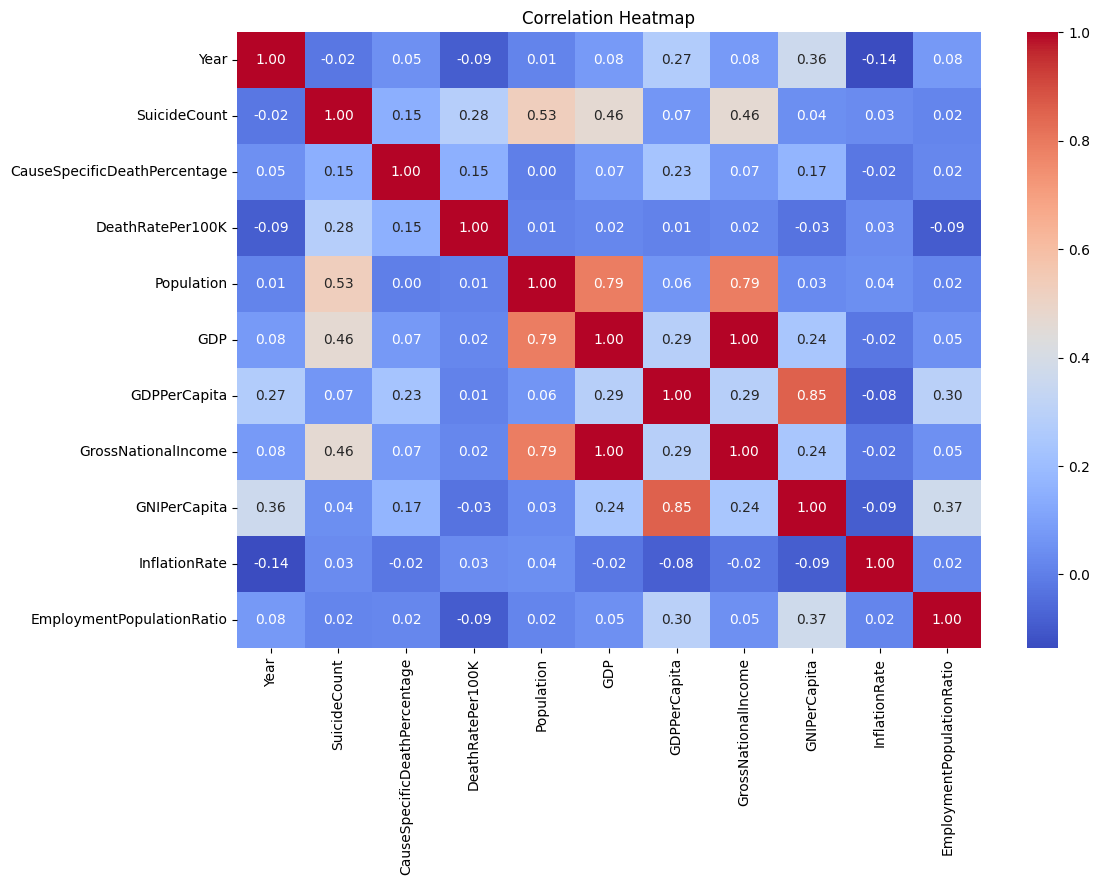

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=cat_features).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##Pair Plot


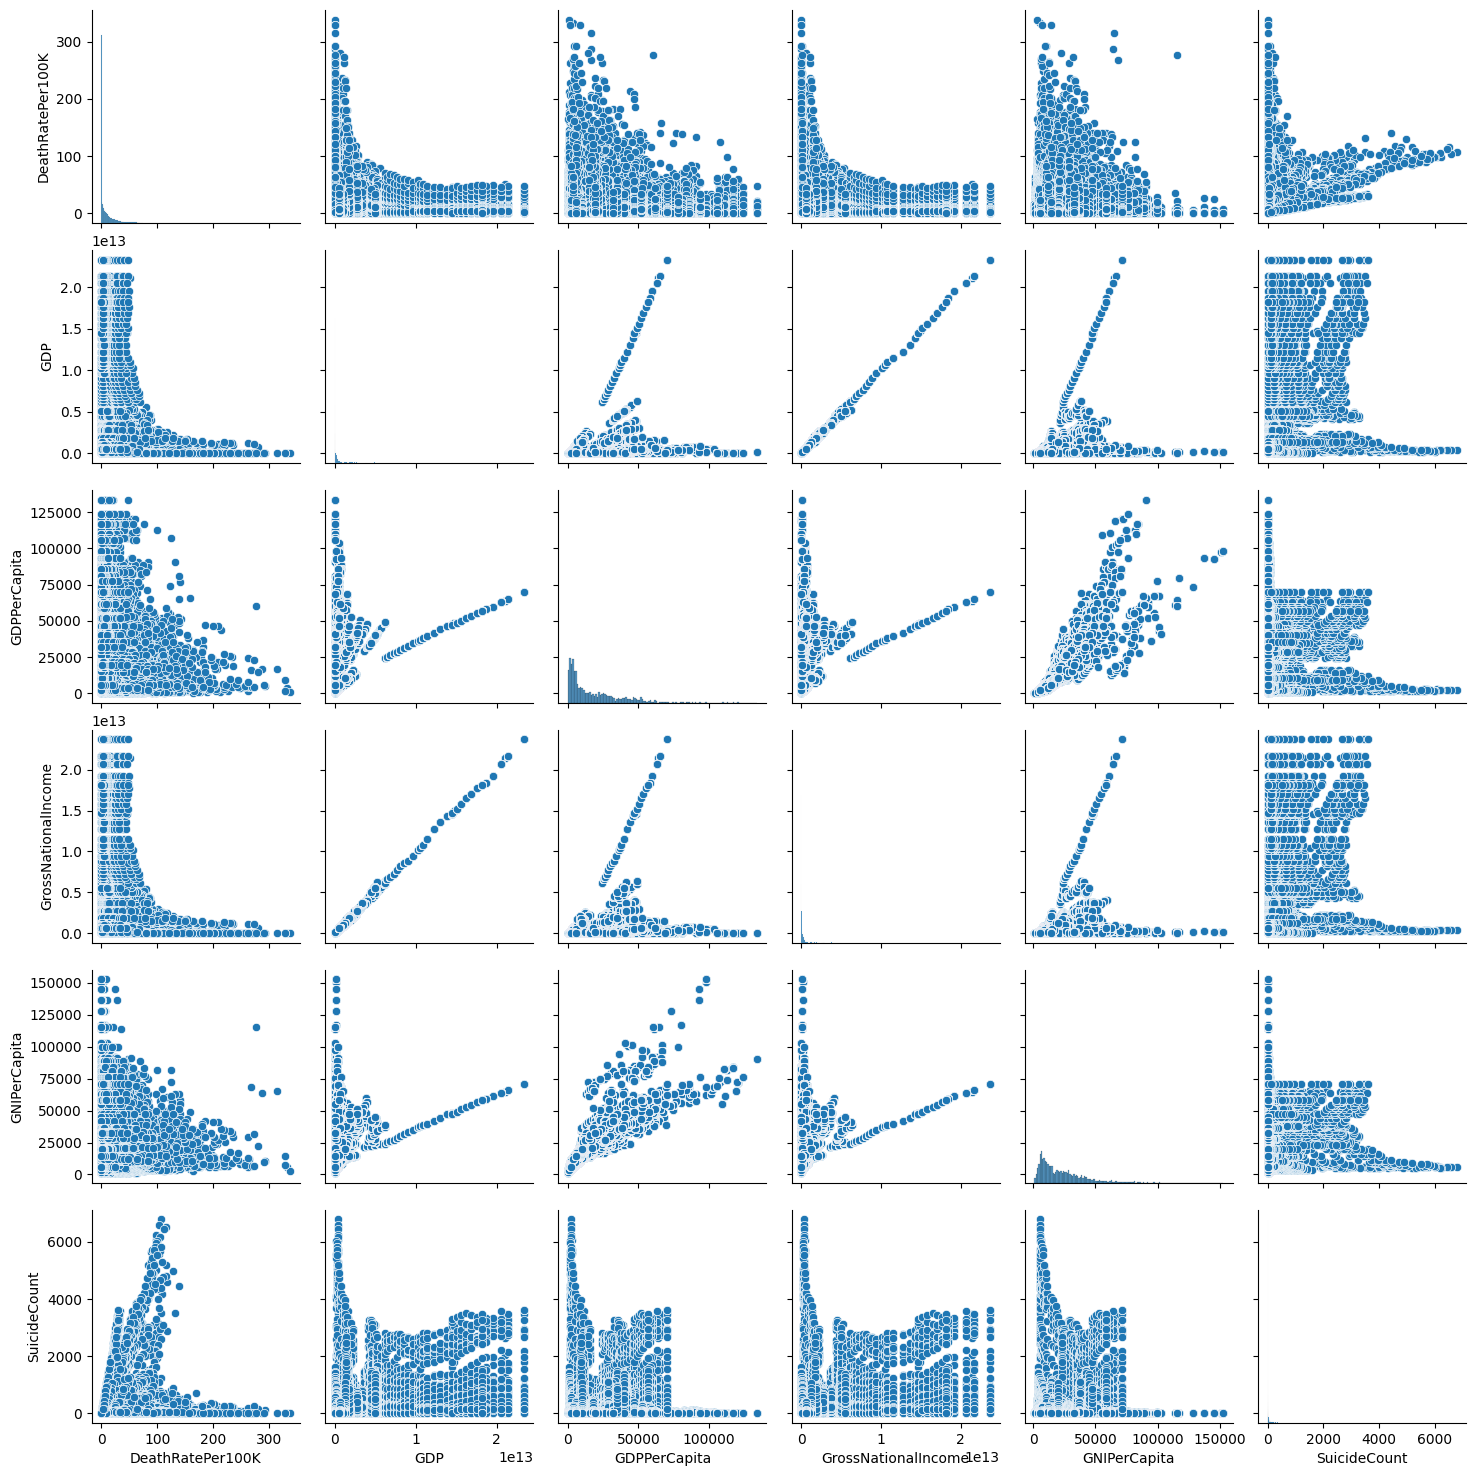

In [ ]:
sns.pairplot(df[['DeathRatePer100K', 'GDP', 'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita','SuicideCount']])
plt.show()

# Prediction with df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('data.csv')

# Check the data structure
print(data.head())

# Extract features and target variable
X = data.drop('SuicideCount', axis=1)
y = data['SuicideCount']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessor and fit on training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {'MSE': mse, 'R2': r2}

    print(f"{model_name}: MSE = {mse:.4f}, R2 = {r2:.4f}")

# Compare the performance of the models
results_df = pd.DataFrame(results).T
print(results_df)

  RegionCode RegionName CountryCode CountryName  Year   Sex     AgeGroup  \
0         EU     Europe         ALB     Albania  1992  Male   0-14 years   
1         EU     Europe         ALB     Albania  1992  Male   0-14 years   
2         EU     Europe         ALB     Albania  1992  Male   0-14 years   
3         EU     Europe         ALB     Albania  1992  Male   0-14 years   
4         EU     Europe         ALB     Albania  1992  Male  15-24 years   

         Generation  SuicideCount  CauseSpecificDeathPercentage  \
0  Generation Alpha           0.0                      0.000000   
1  Generation Alpha           0.0                      0.000000   
2  Generation Alpha           0.0                      0.000000   
3  Generation Alpha           0.0                      0.000000   
4      Generation Z           5.0                      3.401361   

   DeathRatePer100K  Population          GDP  GDPPerCapita  \
0          0.000000   3247039.0  652174990.8     200.85222   
1          0.000

# **4.0 Modelling**

## Prediction with Clean data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('data_clean.csv')

# Check the data structure
print(data.head())

# Extract features and target variable
X = data.drop('SuicideCount', axis=1)
y = data['SuicideCount']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessor and fit on training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {'MSE': mse, 'R2': r2}

    print(f"{model_name}: MSE = {mse:.4f}, R2 = {r2:.4f}")

# Compare the performance of the models
results_df = pd.DataFrame(results).T
print(results_df)

  RegionName CountryName    Year  Sex  Generation  SuicideCount  \
0     Europe     Albania  1992.0  1.0         6.0           0.0   
1     Europe     Albania  1992.0  1.0         6.0           0.0   
2     Europe     Albania  1992.0  1.0         6.0           0.0   
3     Europe     Albania  1992.0  1.0         6.0           0.0   
4     Europe     Albania  1992.0  1.0         5.0           5.0   

   CauseSpecificDeathPercentage  DeathRatePer100K  Population          GDP  \
0                      0.000000          0.000000   3247039.0  652174990.8   
1                      0.000000          0.000000   3247039.0  652174990.8   
2                      0.000000          0.000000   3247039.0  652174990.8   
3                      0.000000          0.000000   3247039.0  652174990.8   
4                      3.401361          3.531073   3247039.0  652174990.8   

   GDPPerCapita  GrossNationalIncome  GNIPerCapita  InflationRate  \
0     200.85222          906184212.3        1740.0     226.

## **5.0 Result Evaluation and Interpretation**